<a href="https://colab.research.google.com/github/utkarshg1/DeepLearning-6th-July/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression with Keras

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the dataset

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.duplicated().sum()

41

In [6]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [7]:
df = df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


### Seperate X and Y (PE)

In [8]:
X = df.drop(columns=['PE'])
Y = df[['PE']]

In [9]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [10]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4: Preprocess X using pipeline

In [11]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scale', StandardScaler())]).set_output(transform='pandas')

In [14]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### Apply Train Test split

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [16]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [17]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [18]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [19]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [20]:
xtrain.shape

(7621, 4)

In [21]:
xtest.shape

(1906, 4)

In [22]:
xtrain.shape[1]

4

### Step 5: Build the neural network
Hidden Layer use relu as activation function
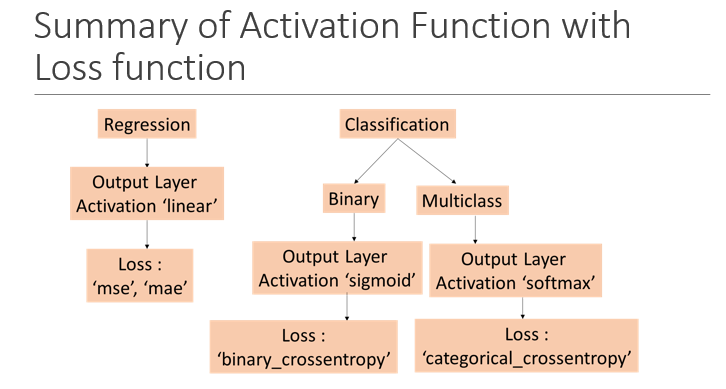

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [24]:
# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16, activation='relu'))

# Add Hidden layer 2
model.add(Dense(8, activation='relu'))

# Add output layer
model.add(Dense(1, activation='linear'))

In [25]:
# Compile the model
model.compile(loss="mse", metrics=["mae"], optimizer="adam")

In [26]:
hist = model.fit(xtrain, ytrain,
                 validation_data=(xtest, ytest),
                 epochs=60)

Epoch 1/60
239/239 [==============================] - 8s 9ms/step - loss: 203804.6406 - mae: 451.1280 - val_loss: 196647.8281 - val_mae: 443.1685
Epoch 2/60
239/239 [==============================] - 1s 4ms/step - loss: 173179.0156 - mae: 415.2104 - val_loss: 138602.3125 - val_mae: 370.9026
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 96479.7969 - mae: 300.4061 - val_loss: 58175.7305 - val_mae: 222.4844
Epoch 4/60
239/239 [==============================] - 1s 4ms/step - loss: 38967.7305 - mae: 174.0988 - val_loss: 25705.2305 - val_mae: 138.2395
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 20344.5762 - mae: 122.2155 - val_loss: 16003.5557 - val_mae: 108.4109
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 13711.3369 - mae: 99.9746 - val_loss: 11070.2334 - val_mae: 89.3262
Epoch 7/60
239/239 [==============================] - 1s 4ms/step - loss: 9319.8066 - mae: 81.6300 - val_loss: 7242.9102 - val_mae: 71

In [27]:
hist.history["loss"]

[203804.640625,
 173179.015625,
 96479.796875,
 38967.73046875,
 20344.576171875,
 13711.3369140625,
 9319.806640625,
 5862.498046875,
 3530.026611328125,
 2128.243896484375,
 1306.896240234375,
 826.3829956054688,
 544.8607177734375,
 374.0664367675781,
 264.9676208496094,
 191.1094207763672,
 141.71014404296875,
 107.70380401611328,
 84.23460388183594,
 67.7293472290039,
 56.21848678588867,
 48.010929107666016,
 41.91572189331055,
 37.13896560668945,
 33.5416259765625,
 30.7530460357666,
 28.7435359954834,
 27.035045623779297,
 25.82695960998535,
 24.757110595703125,
 23.9593448638916,
 23.470157623291016,
 23.063777923583984,
 22.65792465209961,
 22.21448516845703,
 22.0145320892334,
 21.85247230529785,
 21.531694412231445,
 21.132213592529297,
 20.92304801940918,
 20.587316513061523,
 20.554668426513672,
 20.565147399902344,
 20.284801483154297,
 20.297801971435547,
 20.278966903686523,
 20.152376174926758,
 20.102582931518555,
 20.150588989257812,
 20.015277862548828,
 20.35027503

In [28]:
hist.history['val_loss']

[196647.828125,
 138602.3125,
 58175.73046875,
 25705.23046875,
 16003.5556640625,
 11070.2333984375,
 7242.91015625,
 4384.98486328125,
 2621.320556640625,
 1586.5782470703125,
 981.2716674804688,
 632.02734375,
 424.02459716796875,
 300.3265686035156,
 213.1291961669922,
 155.25437927246094,
 117.04865264892578,
 91.1080093383789,
 72.86444854736328,
 60.43666458129883,
 50.34937286376953,
 43.817413330078125,
 38.9469108581543,
 35.095001220703125,
 32.443119049072266,
 30.266075134277344,
 28.300809860229492,
 26.684633255004883,
 25.90680503845215,
 24.893632888793945,
 24.47816276550293,
 23.753503799438477,
 23.17997169494629,
 22.76125717163086,
 22.461647033691406,
 22.606708526611328,
 22.292932510375977,
 21.622753143310547,
 21.255128860473633,
 21.247591018676758,
 20.94969367980957,
 20.86925506591797,
 21.076812744140625,
 20.329587936401367,
 20.392929077148438,
 20.38014030456543,
 20.764192581176758,
 20.11504554748535,
 20.204866409301758,
 21.717742919921875,
 19.73

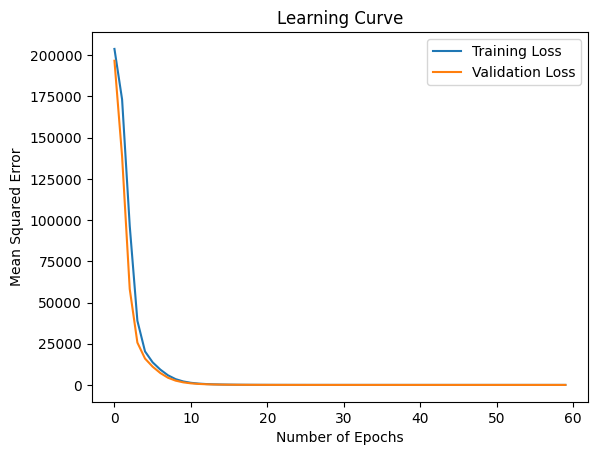

In [30]:
import matplotlib.pyplot as plt
plt.plot(hist.history["loss"], label="Training Loss")
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [31]:
model.evaluate(xtrain, ytrain)

239/239 [==============================] - 1s 2ms/step - loss: 19.5032 - mae: 3.4836


[19.503162384033203, 3.483583688735962]

In [32]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 2ms/step - loss: 19.6744 - mae: 3.5175


[19.674407958984375, 3.517514944076538]

### Predict the results for train and test

In [40]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 2ms/step


In [41]:
ypred_train[0:5]

array([[451.15118],
       [478.06586],
       [468.36005],
       [433.08893],
       [466.6353 ]], dtype=float32)

In [42]:
ytrain.head()

,PE
5703,446.68
7322,483.54
9105,461.71
6436,437.38
6790,463.71


In [43]:
ypred_test[0:5]

array([[430.27246],
       [481.3324 ],
       [483.06183],
       [450.08093],
       [446.70688]], dtype=float32)

In [44]:
ytest.head()

,PE
1087,429.38
6319,485.29
8052,480.40
9524,452.30
4463,446.47


In [45]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain, ypred_train)

0.9321452119580387

In [46]:
# R2 score in test
r2_score(ytest, ypred_test)

0.9348075554462042

### Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [47]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [48]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [49]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [51]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 2ms/step


array([[445.17188],
       [439.60712],
       [431.61444],
       [439.88834],
       [474.2948 ]], dtype=float32)

In [52]:
xnew["PowerOutput_pred"] = preds

In [53]:
xnew

,AT,V,AP,RH,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,445.171875
1,28.88,54.89,1007.16,46.60,439.607117
2,27.89,73.21,1001.32,85.88,431.614441
3,25.69,62.26,1011.38,74.08,439.888336
4,12.16,40.81,1025.79,70.97,474.294800
...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.725403
96,11.78,39.96,1011.37,82.95,471.813965
97,5.62,41.38,1020.91,86.21,483.836823
98,24.96,74.99,1008.25,80.52,436.469299


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

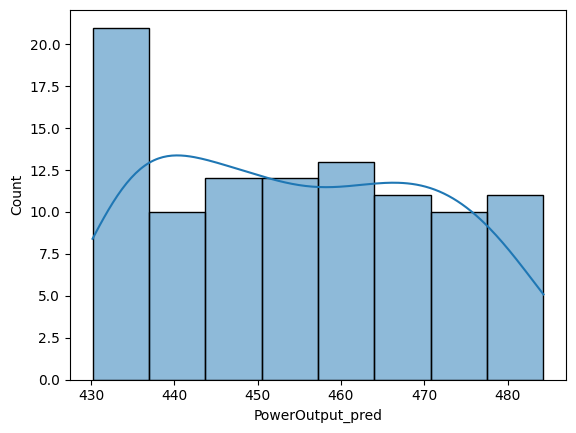

In [55]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred", kde=True)

In [56]:
xnew.to_csv("Results.csv", index=False)